<a href="https://colab.research.google.com/github/Todayis0613/YelpProject_Beauty-Salon-Recommendation/blob/main/3_Topic_Modleing_Bizgrow006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the saved CSV file
file_path = "/content/drive/My Drive/ASU/509/Project Data/processed_reviews.csv"
reviews_df = pd.read_csv(file_path)

# Check if data loaded correctly
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,tokens,review_length,sentiment_score,sentiment_category
0,S9VRIhPFn9Sl_yQgQWSjWg,mV6SGJKgJT1d6GeC5TdOHQ,I3bujTHGk2scZfz4mMNq3w,2,0,0,0,Fix the ladies bathroom sinks. They do not sta...,2022-01-19 17:46:47,2022,"['fix', 'the', 'ladies', 'bathroom', 'sinks', ...",77,0.7992,Positive
1,LEZNilOu2qnvPcKBze7sZg,qThG1M8CoFsyl-gkSek2ZQ,eMUXEPKllxw6FhWVoxkKXQ,5,0,0,0,I can't speak highly enough of this salon Go s...,2022-01-19 12:13:51,2022,"['i', 'ca', ""n't"", 'speak', 'highly', 'enough'...",37,0.8874,Positive
2,toFQ61E8RqlLj_76QrdfDQ,CcvNlfou5b99umxnd1zChg,jAmnB-jWh-ApQ27E3057Aw,5,0,0,0,I cannot speak higher about Tyler at Grape Ape...,2022-01-19 05:41:58,2022,"['i', 'can', 'not', 'speak', 'higher', 'about'...",184,0.9936,Positive
3,cfcDG_hHm8vIwGX27s4_7Q,-V37fpiyG4HmtjXLvSWV0w,WqL6qsaK2UKQKJph4XaMJA,5,0,0,0,I have been coming here since they opened. I ...,2022-01-19 05:04:50,2022,"['i', 'have', 'been', 'coming', 'here', 'since...",76,0.6987,Positive
4,Clq6eb5NzJm1otz6nXdZ6Q,Hxfwej6Sli5yxfLmpGgkfQ,isl76zjJElJ-AYq4Mry2sQ,5,0,0,0,Thank you Angela!!! This was my first lash ext...,2022-01-19 02:07:03,2022,"['thank', 'you', 'angela', 'this', 'was', 'my'...",91,0.9672,Positive


### Topic Modeling using BERT

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer


In [ ]:
# Check for missing values
reviews_df.dropna(subset=["text"], inplace=True)

# Convert the date column to datetime format
reviews_df["date"] = pd.to_datetime(reviews_df["date"])

# Display dataset info
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15361 entries, 0 to 15360
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   review_id           15361 non-null  object        
 1   user_id             15361 non-null  object        
 2   business_id         15361 non-null  object        
 3   stars               15361 non-null  int64         
 4   useful              15361 non-null  int64         
 5   funny               15361 non-null  int64         
 6   cool                15361 non-null  int64         
 7   text                15361 non-null  object        
 8   date                15361 non-null  datetime64[ns]
 9   year                15361 non-null  int64         
 10  tokens              15361 non-null  object        
 11  review_length       15361 non-null  int64         
 12  sentiment_score     15361 non-null  float64       
 13  sentiment_category  15361 non-null  object    

In [ ]:
# Define UMAP parameters
umap_model = UMAP(n_components=5, n_neighbors=15, metric="cosine")

# Use a transformer-based embedding model
embedding_model = SentenceTransformer("paraphrase-MiniLM-L3-v2")

# Initialize BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    top_n_words=10,
    verbose=True
)

# Train BERTopic model on Yelp reviews
topics, probs = topic_model.fit_transform(reviews_df["text"])

# View topic distribution
topic_model.get_topic_info()


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-03-01 00:24:07,724 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/481 [00:00<?, ?it/s]

2025-03-01 00:29:49,193 - BERTopic - Embedding - Completed ✓
2025-03-01 00:29:49,195 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-01 00:30:31,307 - BERTopic - Dimensionality - Completed ✓
2025-03-01 00:30:31,308 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-01 00:30:32,213 - BERTopic - Cluster - Completed ✓
2025-03-01 00:30:32,224 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-01 00:30:33,424 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,5739,-1_and_the_to_was,"[and, the, to, was, my, they, for, in, is, she]",[Okay so I came to get a full set. Now this is...
1,0,2222,0_hair_cut_haircut_my,"[hair, cut, haircut, my, to, and, she, it, the...","[Worse experience ever!!, they ruined my hair ..."
2,1,2108,1_nails_nail_my_the,"[nails, nail, my, the, and, they, to, was, ped...",[I went in seeing all the good reviews for thi...
3,2,1020,2_massage_and_the_was,"[massage, and, the, was, massages, to, of, the...",[This is one of the best massages you can get ...
4,3,749,3_we_the_room_resort,"[we, the, room, resort, our, pool, hotel, food...",[Where do I begin... I took my fiancé there fo...
...,...,...,...,...,...
56,55,11,55_kusman_dr_staff_he,"[kusman, dr, staff, he, neda, results, explain...",[My expectations have been exceeded by Dr. Kus...
57,56,11,56_pedicure_very_salon_time,"[pedicure, very, salon, time, ve, organized, r...",[Came here for a pedicure with my mom. This pl...
58,57,11,57_open_deli_until_store,"[open, deli, until, store, 745pm, hours, door,...",[They are never open during their advertised h...
59,58,11,58_le_salon_while_ve,"[le, salon, while, ve, nails, to, in, from, as...",[I had previously visited Golden Nails a few y...


In [ ]:
# Plot most frequent topics
topic_model.visualize_barchart(top_n_topics=10)


### Topic Interpretation of Yelp Reviews

#### **1. Overview of Extracted Topics**
Below is the interpretation of the discovered topics from the Yelp reviews dataset. Each topic is assigned a theme based on the most relevant words identified.

| **Topic** | **Theme** | **Interpretation** |
|-----------|-----------|--------------------|
| **Topic 0** | Haircuts & Styling | Focuses on haircuts, hairstyling, and salon-related services. Likely includes discussions about barber shops, hairstylists, and personal grooming. |
| **Topic 1** | Nail Care & Manicures | Discusses nail-related services, including manicures, nail salons, and customer experiences with nail technicians. |
| **Topic 2** | Massage Therapy | Mentions "massage," "massages," and relaxation-related terms. Likely associated with spa services, relaxation therapy, or wellness treatments. |
| **Topic 3** | Hotel & Resort Experiences | Includes words like "room," "resort," and "our," indicating customer experiences at hotels, resorts, or vacation stays. |
| **Topic 4** | Tattoo Services | Contains words like "tattoo," "tattoos," and "artist," indicating discussions related to tattoo shops, tattoo artists, and customer experiences. |
| **Topic 5** | Customer Service & Staff Friendliness | Includes words like "staff," "friendly," and "service," suggesting reviews focused on interactions with employees and customer service quality. |
| **Topic 6** | Tucson-Based Nail & Beauty Services | Mentions "Tucson," "nail," and "salon," indicating discussions specific to beauty services in Tucson, Arizona. |
| **Topic 7** | Eyelash Extensions | Contains keywords like "lashes," "lash," and "extensions," pointing to discussions about eyelash extension services and experiences. |
| **Topic 8** | Eyebrow & Threading Services | Keywords like "eyebrows," "threading," and "wax" indicate discussions on eyebrow shaping, threading, and waxing services. |
| **Topic 9** | Waxing & Brazilian Wax Services | Mentions "wax," "brazilian," and "waxing," indicating discussions around hair removal services, particularly Brazilian waxing. |

---

#### **2. Business Implications**
##### ***Positive Aspects***
**Strong Focus on Beauty & Personal Care**  
- Many topics revolve around **haircuts, nails, massages, tattooing, eyelash extensions, and waxing**, indicating that Yelp users frequently review beauty and self-care services.  

**Customer Service Plays a Key Role**  
- **Topic 5 (Customer Service & Staff Friendliness)** suggests that staff behavior and friendliness are significant factors influencing customer satisfaction.  

**Regional Trends Can Be Leveraged**  
- **Topic 6 (Tucson Beauty Services)** indicates that local businesses in Tucson have a notable presence, meaning targeted marketing efforts could be beneficial.

---

##### ***Areas of Concern***
**Potential Complaints About Service Quality**  
- Businesses in **hair, nails, massage, and tattooing services** should monitor negative reviews related to service quality and friendliness to maintain strong customer retention.

**Hygiene & Cleanliness Issues in Beauty Services**  
- Since many topics are **personal care-related**, businesses should ensure high cleanliness standards to avoid negative feedback in **waxing, facials, and massages**.

---

#### ***3. Recommendations***
**Improve Service Quality**  
- Ensuring high-quality service and **friendly staff interactions** could **significantly boost ratings**.

**Leverage Positive Trends in Local Markets**  
- Tucson-based businesses, as seen in **Topic 6**, can create **localized promotions** based on trends in Yelp reviews.

In [ ]:
# Visualize topic hierarchy
topic_model.visualize_hierarchy()


In [ ]:
for i in range(5):  # Display top 5 topics
    print(f"Topic {i}: ", topic_model.get_topic(i))


Topic 0:  [('hair', 0.0321071232946349), ('cut', 0.018893386961492235), ('haircut', 0.016701761412427817), ('my', 0.01494526060200101), ('to', 0.014090066558226755), ('and', 0.013728350759652525), ('she', 0.013356693423669954), ('it', 0.012364551447982708), ('the', 0.011968064112414082), ('was', 0.0108961778763711)]
Topic 1:  [('nails', 0.026222229003330967), ('nail', 0.016868966371779728), ('my', 0.016567754760769528), ('the', 0.013329608326815559), ('and', 0.013183484052613199), ('they', 0.012939937593401769), ('to', 0.01235089525737648), ('was', 0.012314540579187743), ('pedicure', 0.012053290374769748), ('it', 0.011144122536451887)]
Topic 2:  [('massage', 0.04741238075655), ('and', 0.014285737606250837), ('the', 0.013464550833727957), ('was', 0.01296454242144077), ('massages', 0.0123346796885826), ('to', 0.012053084925481142), ('of', 0.011580141917332951), ('therapist', 0.01146694213555964), ('back', 0.011218535095233469), ('for', 0.01100945742013537)]
Topic 3:  [('we', 0.0250961437

In [ ]:
# Generate topics over time
topics_over_time = topic_model.topics_over_time(reviews_df["text"], reviews_df["date"], nr_bins=20)

# Visualize topic trends
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=6)


20it [00:06,  3.33it/s]


## **Interpretation of Topics Over Time**
The visualization shows the frequency of the top 6 topics in Yelp reviews over time.

### **Key Insights**
- **Haircuts & Nail Services** (Topics 0 & 1): Peaked in 2019, dropped in 2020 due to COVID-19, and started recovering in 2021.
- **Massage & Wellness** (Topic 2): Experienced a slow decline in 2020 but is gradually rebounding.
- **Resorts & Rooms** (Topic 3): Sharp decline in 2020, with no strong recovery trend, likely due to prolonged travel restrictions.
- **Tattoo & Body Art** (Topic 4): A steady niche topic with no significant drop, suggesting resilience during the pandemic.
- **Staff Friendliness & Service** (Topic 5): Remained consistently important, with minor dips in 2020.

### **Business Implications**
- COVID-19 heavily impacted salons, wellness centers, and hospitality businesses.
- **Hair & nail services are recovering**, indicating increasing customer visits.
- **Customer service remains a key factor**, highlighting the need for quality interactions.
- **Tattoo services saw stable demand**, showing a potential opportunity for growth.


## Sentiment Score per topic

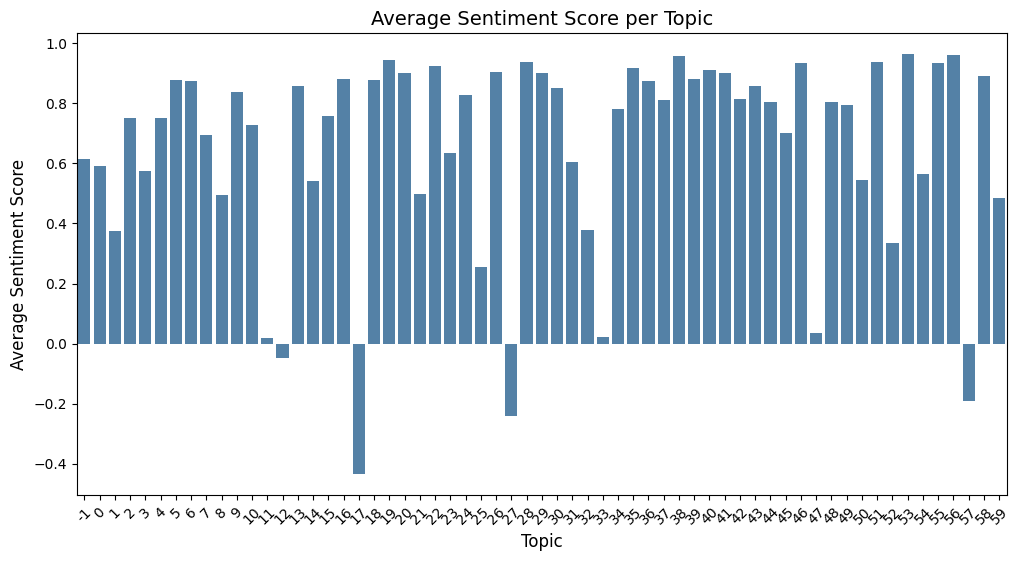

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

topic_sentiment = pd.DataFrame({
    "Topic": topics,
    "Sentiment": reviews_df["sentiment_score"]
}).groupby("Topic").mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=topic_sentiment,
    x="Topic",
    y="Sentiment",
    color="steelblue"
)
plt.xticks(rotation=45)
plt.title("Average Sentiment Score per Topic", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.xlabel("Topic", fontsize=12)
plt.show()

### **Key Findings**
- **Predominantly Positive Topics**: Most topics have sentiment scores above **0.5**, reflecting strong customer satisfaction.
- **Negative Sentiment Topics**: A few topics have scores below **0**, indicating dissatisfaction, likely due to service issues, wait times, or specific food quality concerns.
- **Neutral Topics**: Some topics have scores around **0**, suggesting mixed opinions.

### **Business Implications**
- **Leverage Strengths**: Topics with high sentiment scores should be highlighted in marketing and promotions.
- **Address Weaknesses**: Low-scoring topics need further investigation to resolve recurring issues.
- **Monitor Trends**: Tracking sentiment over time can help businesses proactively adjust their services and offerings.



Negative Topics and Sentiment Scores:
    Topic  Sentiment
13     12  -0.046844
18     17  -0.434642
28     27  -0.241990
58     57  -0.190255


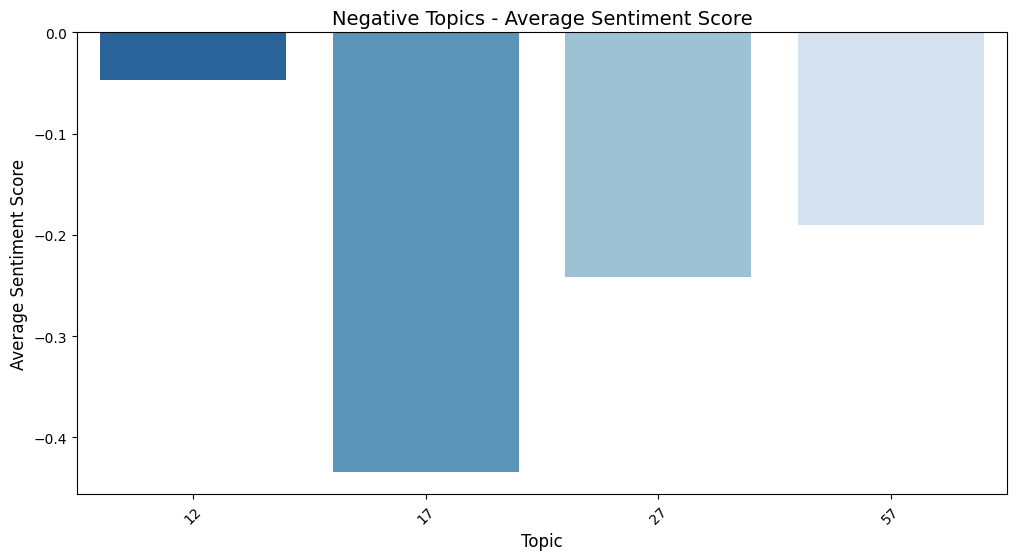

In [ ]:
# Identify negative topics (sentiment score < 0)
negative_topics = topic_sentiment[topic_sentiment["Sentiment"] < 0]

# Print negative topics along with their sentiment scores
print("Negative Topics and Sentiment Scores:")
print(negative_topics)

# Visualize negative topics
plt.figure(figsize=(12,6))
sns.barplot(data=negative_topics, x="Topic", y="Sentiment", palette="Blues_r")  # Use dark blue for negative topics
plt.xticks(rotation=45)
plt.title("Negative Topics - Average Sentiment Score", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.xlabel("Topic", fontsize=12)
plt.show()



In [ ]:
# Generate topics if they haven't been added yet
topics, _ = topic_model.fit_transform(reviews_df["text"])

# Add the topic assignments to the DataFrame
reviews_df["Topic"] = topics


2025-03-01 01:36:15,507 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/481 [00:00<?, ?it/s]

2025-03-01 01:41:47,765 - BERTopic - Embedding - Completed ✓
2025-03-01 01:41:47,766 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-01 01:42:01,665 - BERTopic - Dimensionality - Completed ✓
2025-03-01 01:42:01,668 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-01 01:42:02,550 - BERTopic - Cluster - Completed ✓
2025-03-01 01:42:02,559 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-01 01:42:03,793 - BERTopic - Representation - Completed ✓


In [ ]:
negative_reviews_actual = reviews_df[reviews_df["sentiment_score"] < -0.5]
print("Filtered Negative Reviews Count:", len(negative_reviews_actual))
negative_reviews_actual[["text", "sentiment_score"]].head(10)


Filtered Negative Reviews Count: 1918


,text,sentiment_score
14,Save your nails and go somewhere else. Never i...,-0.5332
18,The owner Michelle T. Responded to my review. ...,-0.9839
26,"I'd recommend Peter, he's the best one but lat...",-0.8329
32,My daughter and I went here for the first time...,-0.8545
36,"I've been in here a few times just for a trim,...",-0.8588
39,I went in on Dec 24 as my regular salon was bo...,-0.8105
42,I asked for a taper fade I have no idea what t...,-0.8674
51,I had a bad football injury many years ago and...,-0.6766
54,They moved idk where they at but i went to ask...,-0.8894
71,He has now gotten his hair cut here 4 times. ...,-0.9137


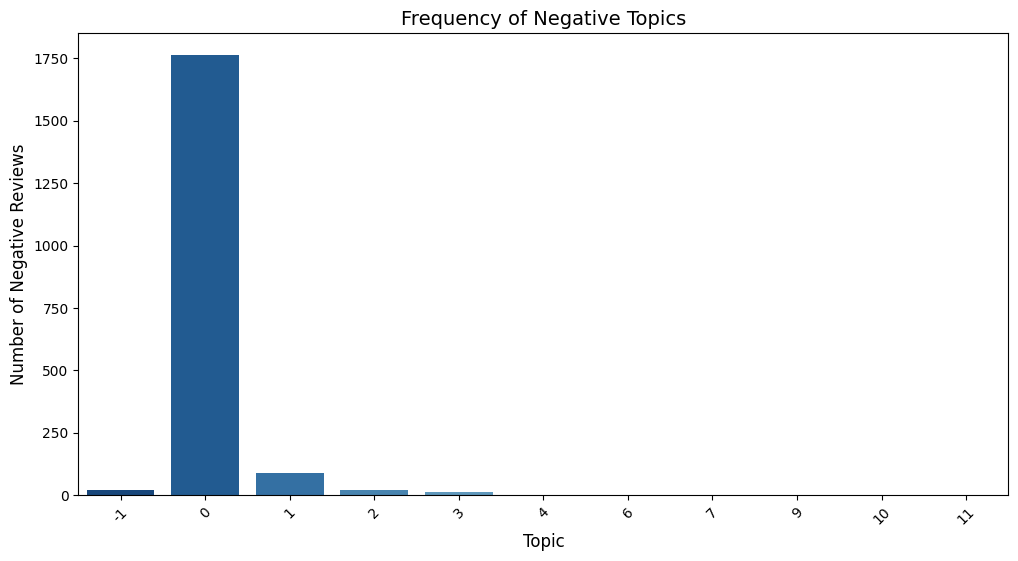

In [ ]:
# Count the number of negative reviews per topic
negative_topic_counts = negative_reviews_actual["Topic"].value_counts().reset_index()
negative_topic_counts.columns = ["Topic", "Count"]

# Visualize the frequency of negative topics
plt.figure(figsize=(12,6))
sns.barplot(data=negative_topic_counts, x="Topic", y="Count", palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Frequency of Negative Topics", fontsize=14)
plt.ylabel("Number of Negative Reviews", fontsize=12)
plt.xlabel("Topic", fontsize=12)
plt.show()

In [ ]:
# Calculate the average sentiment score for all reviews
overall_sentiment_mean = reviews_df["sentiment_score"].mean()

# Calculate the average sentiment score for negative topics
negative_sentiment_mean = negative_reviews_actual["sentiment_score"].mean()

# Print the sentiment score comparison
print(f"Overall Sentiment Score: {overall_sentiment_mean:.3f}")
print(f"Negative Topics Sentiment Score: {negative_sentiment_mean:.3f}")

Overall Sentiment Score: 0.595
Negative Topics Sentiment Score: -0.806


In [ ]:
import pandas as pd

# Load the business data into a DataFrame
file_path = "/content/drive/My Drive/ASU/509/Project Data/business_data1.csv"
business_df = pd.read_csv(file_path)

# Print confirmation
print("\nBusiness Data Loaded Successfully")

# Display dataset shape (rows, columns)
print(f"Shape: {business_df.shape}")

# Check for missing values
print("\nChecking Missing Values in Business Data:")
print(business_df.isnull().sum())

# Display a sample of the data
print("\nSample Business Data:")
business_df.head(3)


Business Data Loaded Successfully
Shape: (776, 14)

Checking Missing Values in Business Data:
business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

Sample Business Data:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,E-nhxuu3zbt02oCj_1AFng,Selah,"510 N 7th Ave, Ste 130",tucson,AZ,85705,32.228092,-110.969804,5.0,60,1,"{'WheelchairAccessible': 'True', 'BikeParking'...","Waxing, Hair Removal, Skin Care, Eyelash Servi...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
1,h_3oLlQ_CFohwlzsrSZ6xQ,The Waxing Queen Of Tucson,2919 E Broadway Blvd,tucson,AZ,85716,32.221849,-110.928450,4.5,17,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Beauty & Spas, Hair Removal, Day Spas, Skin Care","{'Monday': '12:0-19:0', 'Wednesday': '9:0-18:0..."
2,WcSpc5mcfa7NUZ9GQgx0Tg,Endless Summer Tans,1708 E Speedway Blvd,tucson,AZ,85719,32.235689,-110.946462,4.5,9,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Beauty & Spas, Eyelash Service, Skin Care, Tan...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


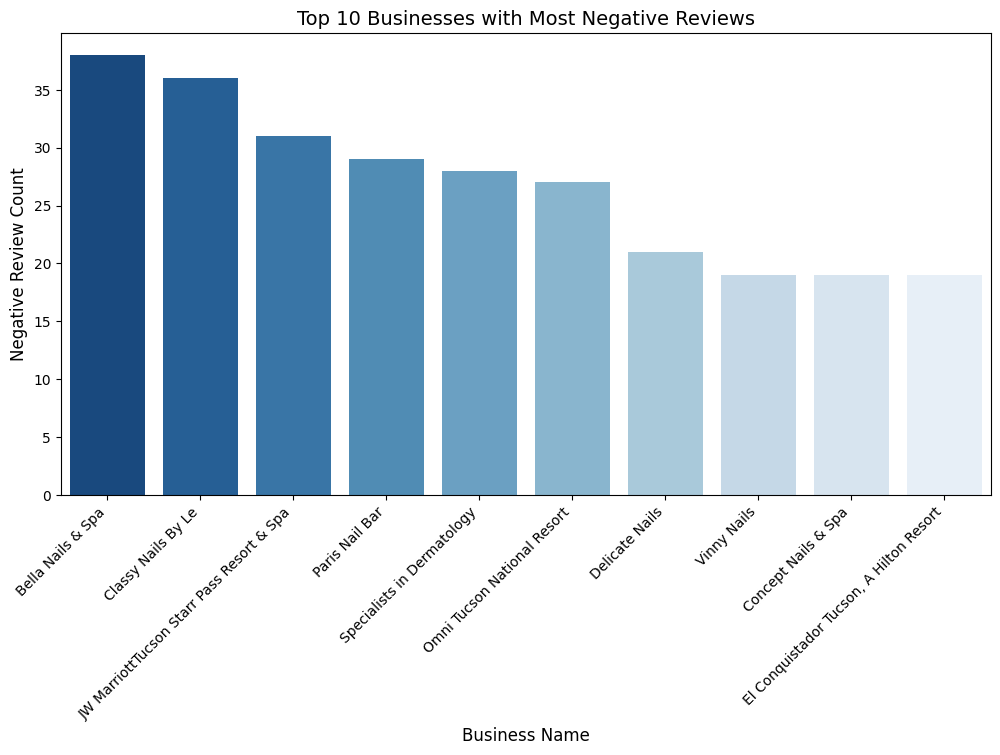

In [ ]:
# Merge business IDs with business names (assuming business_df contains 'business_id' and 'name' columns)
negative_business_counts = negative_business_counts.merge(business_df, left_on="Business ID", right_on="business_id", how="left")

# Use business names for visualization instead of IDs
plt.figure(figsize=(12,6))
sns.barplot(data=negative_business_counts.head(10), x="name", y="Negative Review Count", palette="Blues_r")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.title("Top 10 Businesses with Most Negative Reviews", fontsize=14)
plt.ylabel("Negative Review Count", fontsize=12)
plt.xlabel("Business Name", fontsize=12)
plt.show()


### Extract the keywords at negative sentiment reviews (Keyword Extraction)

In [ ]:
import spacy
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import re

# Load the spaCy model for text processing
nlp = spacy.load("en_core_web_sm")

# Assuming reviews_df is your DataFrame and the sentiment score column indicates the sentiment of reviews
# Filter for negative reviews based on sentiment score < 0
negative_reviews = reviews_df[reviews_df["sentiment_score"] < 0]


In [ ]:
# Function to extract nouns, verbs, and adjectives from reviews
def extract_keywords_from_reviews(reviews_df):
    nouns, verbs, adjectives = [], [], []  # Lists to store nouns, verbs, adjectives

    # Iterate through each negative review
    for review in reviews_df["text"]:
        doc = nlp(review)  # Process the review text with spaCy

        # Extract nouns, verbs, and adjectives
        for token in doc:
            if token.pos_ == "NOUN" and token.text.lower() not in stop_words and len(token.text) > 2:
                nouns.append(token.lemma_.lower())  # Lemmatize noun to its base form
            elif token.pos_ == "VERB" and token.text.lower() not in stop_words and len(token.text) > 2:
                verbs.append(token.lemma_.lower())  # Lemmatize verb to its base form
            elif token.pos_ == "ADJ" and token.text.lower() not in stop_words and len(token.text) > 2:
                adjectives.append(token.lemma_.lower())  # Lemmatize adjective to its base form

    return nouns, verbs, adjectives
# Extract nouns, verbs, and adjectives
nouns, verbs, adjectives = extract_keywords_from_reviews(negative_reviews)

# Count word frequencies for each part of speech
noun_counts = Counter(nouns)
verb_counts = Counter(verbs)
adjective_counts = Counter(adjectives)

# Get the top 20 most common words for each part of speech
top_nouns = noun_counts.most_common(20)
top_verbs = verb_counts.most_common(20)
top_adjectives = adjective_counts.most_common(20)

# Convert to DataFrame for visualization
noun_df = pd.DataFrame(top_nouns, columns=["Word", "Frequency"])
verb_df = pd.DataFrame(top_verbs, columns=["Word", "Frequency"])
adjective_df = pd.DataFrame(top_adjectives, columns=["Word", "Frequency"])


Text(0, 0.5, 'Word')

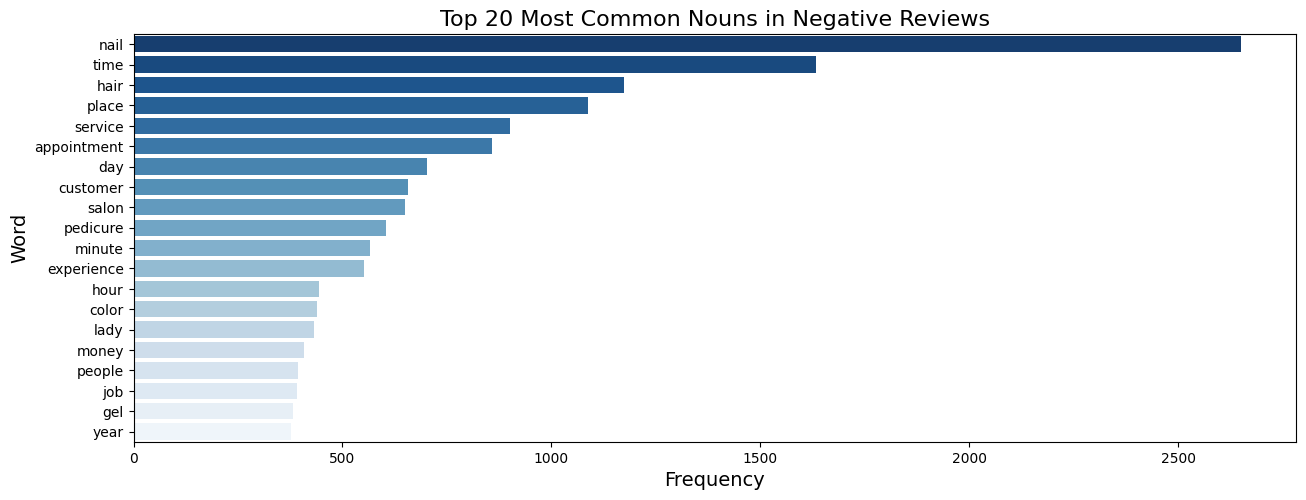

In [ ]:
# Adjusting figure size and layout for better readability
plt.figure(figsize=(15, 18))  # Larger figure size for better clarity

# Plot Nouns
plt.subplot(3, 1, 1)
sns.barplot(data=noun_df, x="Frequency", y="Word", palette="Blues_r")
plt.title("Top 20 Most Common Nouns in Negative Reviews", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Word", fontsize=14)

### **Common Issues Identified in Negative Reviews**

####**Key Findings**
- **Frequent Complaints on Nail and Hair Services**  
  - The most common nouns in negative reviews are **"nail"**, **"hair"**, and **"service"**, suggesting recurring dissatisfaction in these areas.  
  - Possible concerns could include **quality of work, staff expertise, or durability of treatments**.

- **Time and Appointment-Related Frustrations**  
  - Words like **"time," "appointment," "minute," and "hour"** indicate that **wait times, scheduling issues, or delays** are major pain points.  
  - Customers may experience **long wait times, last-minute cancellations, or overbooked salons**.

- **Customer Experience and Service Quality Issues**  
  - The presence of **"customer," "service," and "experience"** suggests dissatisfaction with **staff behavior, professionalism, or overall treatment quality**.  
  - Businesses may need to **improve customer interactions and responsiveness**.

- **Price and Value Concerns**  
  - Terms such as **"money"** suggest complaints about pricing, possibly due to **overpricing, hidden charges, or perceived lack of value**.  
  - Aligning **pricing with service quality** could help mitigate negative feedback.

#### **Business Implications**
1. **Improve Service Quality**  
   - Address complaints related to **nail and hair treatments** by **ensuring staff training and consistency**.  
2. **Enhance Scheduling and Wait Time Management**  
   - Optimize **appointment booking systems** and minimize delays.  
3. **Strengthen Customer Service**  
   - Ensure that staff provides **friendly, professional, and responsive interactions**.  
4. **Review Pricing and Value Perception**  
   - Ensure that **service pricing matches customer expectations** to prevent dissatisfaction.


Text(0, 0.5, 'Word')

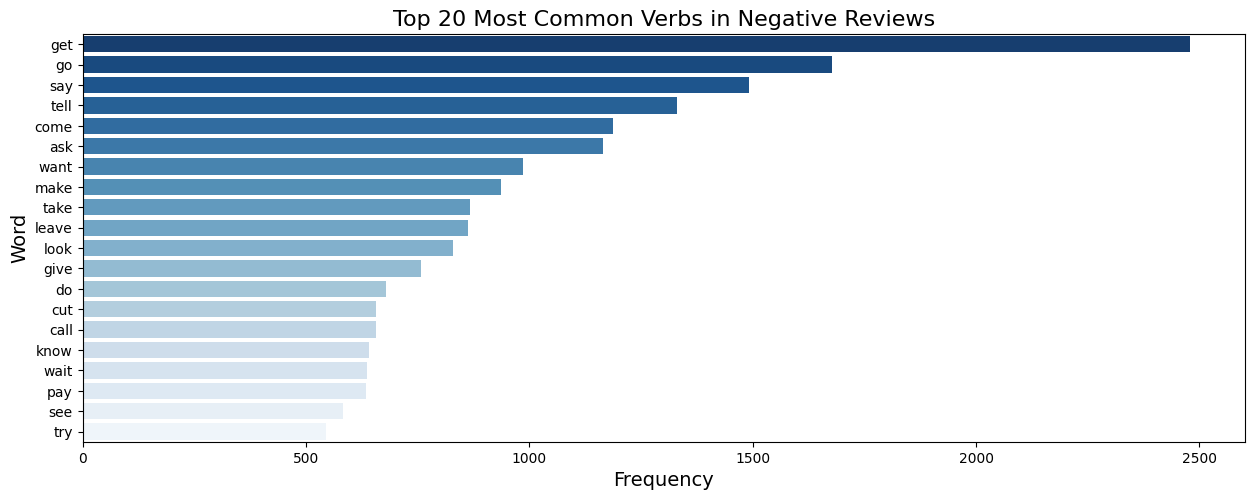

In [ ]:
# Plot the top 20 most common nouns, verbs, and adjectives
plt.figure(figsize=(15, 18))

# Plot Verbs
plt.subplot(3, 1, 2)
sns.barplot(data=verb_df, x="Frequency", y="Word", palette="Blues_r")
plt.title("Top 20 Most Common Verbs in Negative Reviews", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Word", fontsize=14)

### **Key Insights from Negative Review Verbs**

- **Customer Expectations Not Met**  
  - High frequency of **"get," "go," "want," and "ask"** suggests unmet expectations regarding services.  

- **Communication Issues**  
  - Words like **"say," "tell," "call," and "ask"** indicate dissatisfaction with staff interactions and lack of clear communication.  

- **Service Process Complaints**  
  - **"Wait," "leave," and "pay"** suggest long wait times and concerns about service costs or value.  

#### **Actionable Recommendations**  
1. **Enhance Staff Communication** – Train employees to improve clarity and responsiveness.  
2. **Reduce Wait Times** – Optimize scheduling to minimize delays.  
3. **Manage Pricing Concerns** – Align service costs with customer expectations.  


Text(0, 0.5, 'Word')

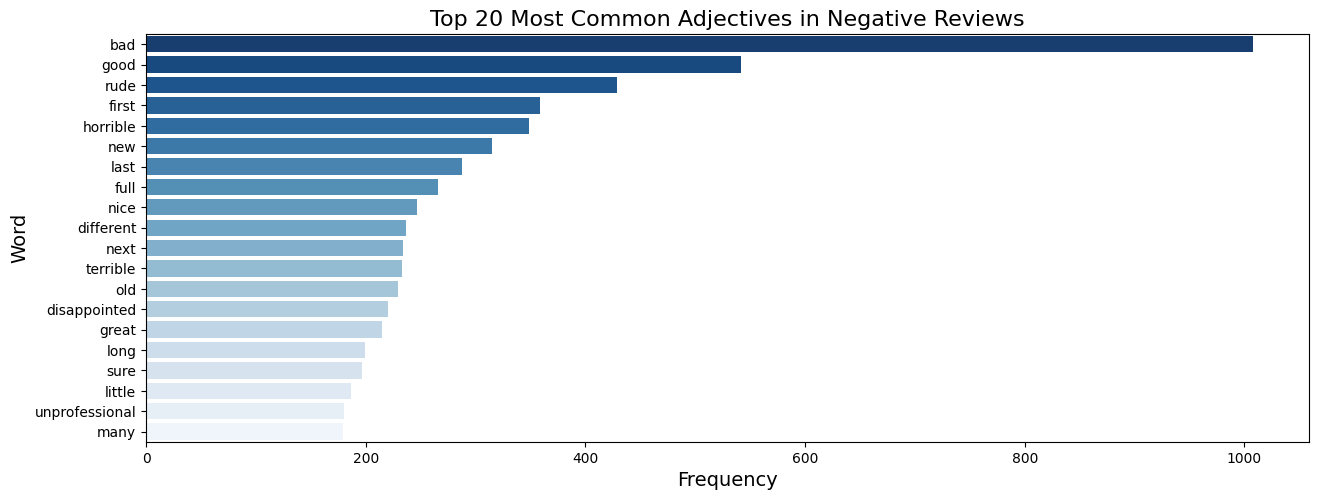

In [ ]:
# Plot the top 20 most common nouns, verbs, and adjectives
plt.figure(figsize=(15, 18))

# Plot Adjectives
plt.subplot(3, 1, 3)
sns.barplot(data=adjective_df, x="Frequency", y="Word", palette="Blues_r")
plt.title("Top 20 Most Common Adjectives in Negative Reviews", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Word", fontsize=14)

### **Key Insights from Negative Review Adjectives**

- **Overall Sentiment**  
  - High occurrence of **"bad," "rude," "horrible," and "disappointed"** suggests significant dissatisfaction.  
  - Presence of **"good" and "nice"** may indicate mixed experiences.  

- **Service & Experience Issues**  
  - Words like **"unprofessional," "terrible," and "long"** point to poor service quality and long wait times.  

### **Actionable Recommendations**  
1. **Improve Service Standards** – Address unprofessional behavior and customer service issues.  
2. **Enhance Customer Experience** – Minimize long wait times and refine operational efficiency.  
3. **Monitor Sentiment Trends** – Track recurring complaints to implement targeted improvements.  


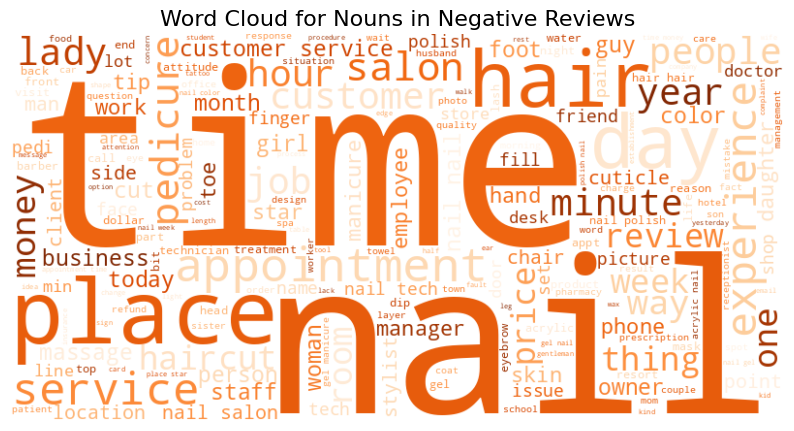

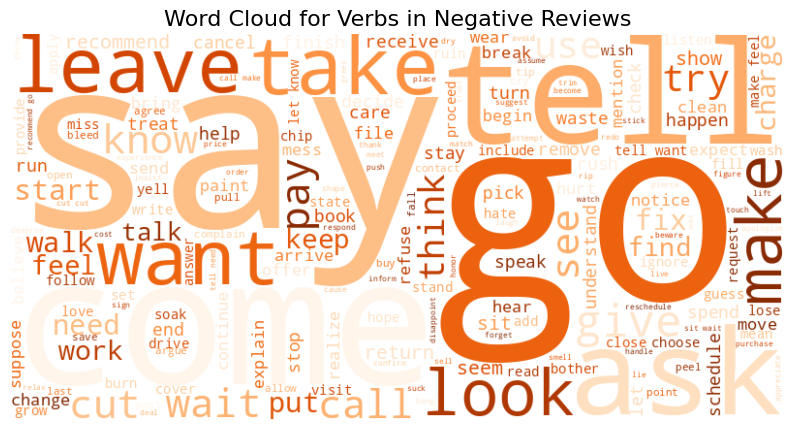

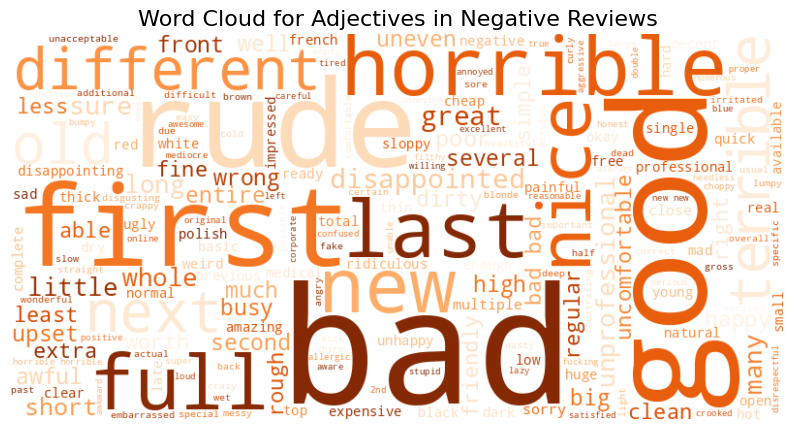

In [ ]:
# Generate Word Clouds for Nouns, Verbs, and Adjectives with orange-red color
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='Oranges').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for nouns, verbs, and adjectives with the orange-red color
generate_wordcloud(" ".join(nouns), "Word Cloud for Nouns in Negative Reviews")
generate_wordcloud(" ".join(verbs), "Word Cloud for Verbs in Negative Reviews")
generate_wordcloud(" ".join(adjectives), "Word Cloud for Adjectives in Negative Reviews")


### Conclusion

- **Key Negative Review Themes**: Customers frequently mention dissatisfaction with "time," "service," "location," "nails," and "haircuts," indicating potential issues in these areas.
- **Action Words in Negative Reviews**: Common verbs such as "leave," "pay," "wait," and "ask" suggest complaints related to service experience, waiting times, and pricing.
- **Sentiment in Adjectives**: Negative adjectives like "bad," "rude," "disappointed," and "horrible" highlight customer dissatisfaction with service quality and overall experience.

These insights can help businesses improve customer service, reduce wait times, and optimize pricing and experience strategies to enhance customer satisfaction.


# **Summary of Topic Modeling Insights**

## **1. Overview of Identified Topics**
- The topic modeling analysis extracted key themes from Yelp reviews, primarily focusing on **beauty and personal care services** such as **haircuts, nails, massages, tattoos, eyelash extensions, and waxing**.
- Topics related to **customer service and cleanliness** also emerged as significant, indicating their importance to customer satisfaction.

## **2. Sentiment Analysis Insights**
- **Predominantly Positive Sentiment**: Most topics had sentiment scores above 0.5, indicating overall satisfaction.
- **Negative Sentiment Areas**: Some topics, particularly those related to **wait times, scheduling, and service quality**, showed negative sentiment scores.
- **Neutral Topics**: A few topics had mixed opinions, highlighting potential inconsistencies in service.

## **3. Key Issues in Negative Reviews**
- **Service Quality Concerns**: Common complaints focused on **nails, haircuts, and massage services**, with mentions of **poor customer interactions and lack of professionalism**.
- **Wait Time & Scheduling Issues**: Terms like **"time," "appointment," and "minute"** indicate frustrations with **delays and overbooked salons**.
- **Pricing and Value Concerns**: Words like **"money" and "pay"** suggest dissatisfaction with **pricing, hidden fees, or perceived lack of value**.

## **4. Business Implications & Recommendations**
### **Leverage Strengths**
- **Capitalize on High-Sentiment Topics**: Promote services that received positive feedback, such as **massages, haircuts, and waxing**.
- **Enhance Staff Friendliness**: Friendly interactions significantly impact reviews and should be a focus area.

### **Address Weaknesses**
- **Improve Service Standards**: Businesses should **train staff** to enhance **customer interactions and professionalism**.
- **Optimize Scheduling & Wait Time Management**: Implement **efficient appointment booking systems** to minimize long wait times.
- **Review Pricing Strategies**: Align **pricing with service quality** to reduce negative feedback.

### **Monitor Trends & Adapt Strategies**
- **Track Customer Sentiment Over Time**: Identify **recurring complaints** and adjust business strategies accordingly.
- **Localize Promotions**: Regional trends in **Tucson-based beauty services** suggest potential for **localized marketing campaigns**.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
reviews_df.to_csv("/content/drive/My Drive/ASU/509/Project Data/topic_modeling.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
